# Laboratorio Estadística Computacional

    - Pablo Mera K. 201773028-5
    - Paula Pérez M. 201603022-0
    - Anghelo Carvajal C. 201473062-4

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
region = pd.read_csv("noc_regions.csv")
athlete = pd.read_csv("athlete_events.csv")
merged = pd.merge(athlete, region, on="NOC", how="left")

### 1. Defina 3 requerimientos de tipo descriptivo y respóndalos con un gráfico.

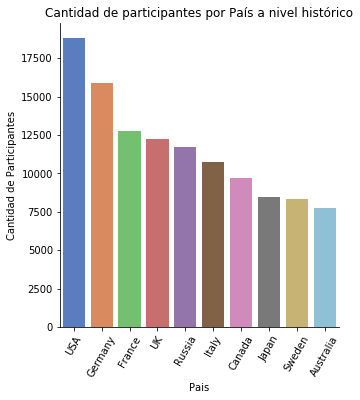

In [3]:
PartPorPais = merged.region.value_counts().reset_index(name='Participantes').head(10)
g1 = sns.catplot("index", "Participantes", data=PartPorPais, kind="bar", palette="muted", legend=False)
g1.set(xlabel='Pais', ylabel='Cantidad de Participantes', title="Cantidad de participantes por País a nivel histórico")
_ = g1.set_xticklabels(rotation=60)

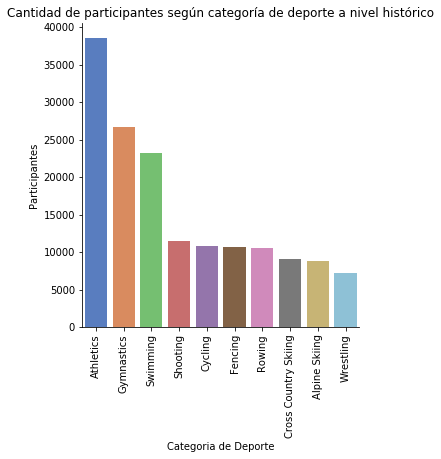

In [4]:
PartPorCateg =  merged.Sport.value_counts().reset_index(name='Participantes').head(10)
g2 = sns.catplot("index", "Participantes", data=PartPorCateg, kind="bar", palette="muted", legend=False)
g2.set(xlabel='Categoria de Deporte', ylabel='Participantes', title="Cantidad de participantes según categoría de deporte a nivel histórico")
_ = g2.set_xticklabels(rotation=90)

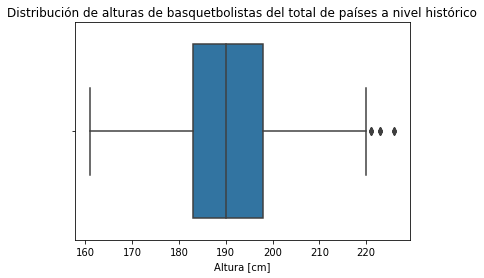

In [5]:
basket = merged[(merged.Sport == 'Basketball')]
g3 = sns.boxplot(x = "Height", data=basket)
_ = g3.set(xlabel='Altura [cm]', title="Distribución de alturas de basquetbolistas del total de países a nivel histórico")

### 2. Construya un scatterplot con al menos 3 variables en consideración.

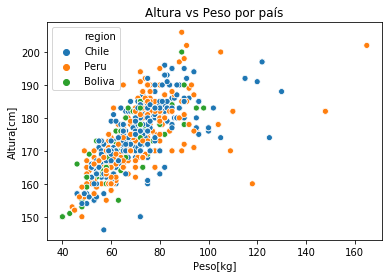

In [6]:
paises = merged[(merged.region == "Chile") | (merged.region == "Boliva") | (merged.region == "Peru")]
ax = sns.scatterplot(x="Weight", y="Height", hue="region", data=paises)
_ = ax.set(xlabel='Peso[kg]', ylabel='Altura[cm]', title="Altura vs Peso por país")

### 3.  Construya un gáfico de boxplot para las variables edad y peso para los países involucrados.

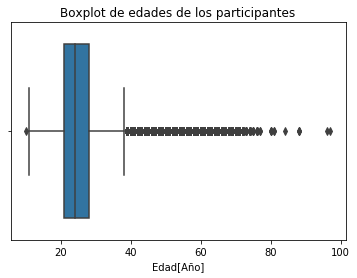

In [7]:
DAge = merged[pd.notnull(merged['Age'])]
g4 = sns.boxplot(x = "Age", data=DAge)
_ = g4.set(xlabel='Edad[Año]', title="Boxplot de edades de los participantes")

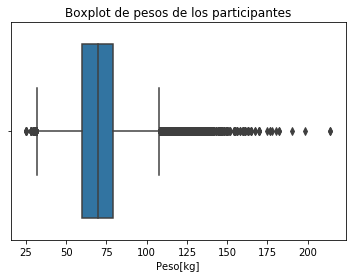

In [8]:
DWeight = merged[pd.notnull(merged['Weight'])]
g5 = sns.boxplot(x = "Weight", data=DWeight)
_ = g5.set(xlabel='Peso[kg]', title="Boxplot de pesos de los participantes")

### 4. Construya un gráfico temporal en el que se pueda observar como varia la cantidad de atletas mujeres y hombres.

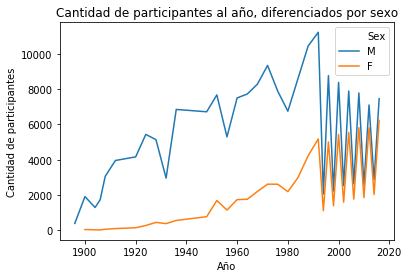

In [9]:
PA = merged.groupby(["Year", "Sex"]).size().reset_index(name="Cant")
g6 = sns.lineplot(x="Year", y="Cant", hue="Sex", data=PA)
_ = g6.set(xlabel='Año', ylabel='Cantidad de participantes', title="Cantidad de participantes al año, diferenciados por sexo")

### 5. Construya un dataframe derivado de los datos compuestos por las siguientes variables:

- País.
- Fecha de la Olimpiada.
- Número de atletas enviados a competir.
- Número de atletas hombres.
- Número de atletas mujeres.
- Número de medallas de bronce obtenidas.
- Número de medallas de plata obtenidas.
- Número de medallas de oro obtenidas.

Luego, obtenga un correlograma de las variables numéricas del nuevo dataframe.

               Year   Atletas  Atletas_M  Atletas_F  Atletas_B  Atletas_S  \
Year       1.000000 -0.124169  -0.234068   0.027425  -0.055739  -0.077842   
Atletas   -0.124169  1.000000   0.970685   0.866809   0.796566   0.770891   
Atletas_M -0.234068  0.970685   1.000000   0.718260   0.765105   0.753339   
Atletas_F  0.027425  0.866809   0.718260   1.000000   0.649320   0.594123   
Atletas_B -0.055739  0.796566   0.765105   0.649320   1.000000   0.772281   
Atletas_S -0.077842  0.770891   0.753339   0.594123   0.772281   1.000000   
Atletas_G -0.047268  0.704839   0.673118   0.572149   0.749427   0.777386   

           Atletas_G  
Year       -0.047268  
Atletas     0.704839  
Atletas_M   0.673118  
Atletas_F   0.572149  
Atletas_B   0.749427  
Atletas_S   0.777386  
Atletas_G   1.000000  


C:\Users\Anghelo\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anghelo\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


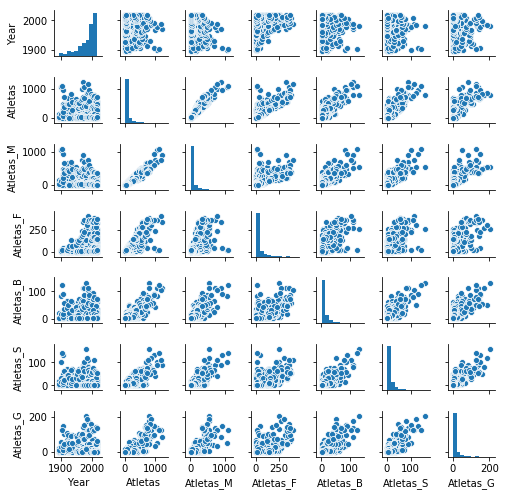

In [10]:
df = merged.groupby(["region", "Year"]).size().reset_index(name="Atletas")
df2 = merged.groupby(["region", "Year","Sex"]).size().reset_index(name="Atletas")

dfM = df2.loc[df2["Sex"] == 'M']

df3 =  pd.merge(df, dfM.drop(columns=['Sex']), on=('region','Year'), how='left', suffixes =('','_M')  )

dfF = df2.loc[df2["Sex"] == 'F']

df3 = pd.merge(df3, dfF.drop(columns=['Sex']), on=('region','Year'), how='left',suffixes =('','_F') )

dfMed = merged.groupby(["region", "Year","Medal"]).size().reset_index(name="Atletas")

dfB = dfMed.loc[dfMed["Medal"] == 'Bronze']

df3 = pd.merge(df3, dfB.drop(columns=['Medal']), on=('region','Year'), how='left',suffixes =('','_B') )

dfS = dfMed.loc[dfMed["Medal"] == 'Silver']

df3 = pd.merge(df3, dfS.drop(columns=['Medal']), on=('region','Year'), how='left',suffixes =('','_S') )

dfG = dfMed.loc[dfMed["Medal"] == 'Gold']

df3 = pd.merge(df3, dfG.drop(columns=['Medal']), on=('region','Year'), how='left',suffixes =('','_G') )


corr = df3.corr()
print(corr)
sns.pairplot(df3, height=1)
plt.show()

# 6. Conclusiones


- El país con mayor número de participantes a nivel histórico en los juegos olímpicos es EEUU, el deporte con mayor cantidad de deportistas a nivel mundial e histórico es el atletismo.
- Los jugadores de básquetbol en las olimpiadas entre todos los países a nivel histórico miden entre 183 y 198 cm, con una mediana de 190 cm
- La distribución de alturas y pesos de los países Chile, Bolivia y Perú son similares, sin embargo se nota que los deportistas peruanos y chilenos tienden a ser levemente más altos y pesados que los deportistas bolivianos.
- Las edades de los participantes tienden a fluctuar entre los 20 y los 30 años, sin embargo la cantidad de participantes que superan este rango etario, pese a ser una minoría no es escaso. La mediana de edad es cercana a los 25 años
- El peso de los participantes suele pertenecer al rango entre los 60 y los 80 kg, la mediana el aproximadamente 70 kg. Existe un notorio número de participantes que excede este rango. La cantidad de participantes por debajo del rango normal de peso es despreciable.
- A través de los años, se ha podido apreciar un gran aumento en el número de participantes de género femenino, y una disminución de la cantidad de participantes masculinos, siendo entre los años 1980 y 2000 el mayor aumento en la cantidad de deportistas.
- Como se puede observar en el apartado 5, se destaca que los años tiene baja relacion con el resto de las variables a estudiar, por ello su indice de correlacion tan cercano a 0, tambien se analiza que  las variable de los hombres esta mas relacionada con las medallas que la variable de las mujeres, por lo que un país que lleva a mas hombres tiene mas posibilidades de traer medallas.